## **Exercise:**

A multivariate dataset ($n = 200, p = 3000$) is available, derived from the evaluation of a Large Language Model (LLM), NLA-7B. The $n$ observations correspond to unique prompts (queries), while the $p$ variables represent a heterogeneous set of metrics (internal activations, human evaluations, and derived performance measures).

The dataset exhibits a severe high-dimensionality problem ($p \gg n$), which invalidates the direct application of classical multivariate methods. The study pursues a dual objective:

1.  To psychometrically validate a 20-item human evaluation sub-instrument, the theoretical structure of which posits four latent constructs (Quality, Safety, Creativity, Bias).

2.  To implement a Factor-Cluster Analysis strategy to identify typological profiles (clusters) of the prompts based on the entirety of the variables, thereby overcoming the challenge.

In [1]:
!pip install rich
!pip install factor-analyzer semopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 1.4 MB/s eta 0:00:00
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42655 sha256=412d8a29b12b78cc260f9642487ad15924dee5fecf66c9a456ce1185abe97e9b
  Stored in directory: /root/.cache/pip/wheels/a2/af/06/f4d4ed4d9d714fda437fb1583629417319603c2266e7b233cc
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659682 sha256=675b50c219f85bac69809c6ab48e88b6ea2782d8f22799f65ff595e21bb71e3f
  Stored in directory: /root/.cache/pip/wheels/c6/24/8b/be911b059a61f490f38425eb19bf2fed470a5ead97228e8255
Successfully built factor-analyzer semopy


In [2]:
import pandas as pd
from rich.console import Console
from factor_analyzer import FactorAnalyzer

console = Console()

In [3]:
df_neuro_lingua = pd.read_csv("https://storage.googleapis.com/questionsanswersproject/Multivariado/neuro_lingua_ai.csv")
console.print(df_neuro_lingua.shape)
df_neuro_lingua.head()

(200, 3001)

,prompt_id,hum_eval_1,hum_eval_2,hum_eval_3,hum_eval_4,hum_eval_5,hum_eval_6,hum_eval_7,hum_eval_8,hum_eval_9,...,int_metric_2971,int_metric_2972,int_metric_2973,int_metric_2974,int_metric_2975,int_metric_2976,int_metric_2977,int_metric_2978,int_metric_2979,int_metric_2980
0,1,-0.339186,-0.287385,0.728980,0.860822,1.186173,2.184202,1.427158,2.025146,0.992884,...,-0.192521,3.378995,-2.321888,1.960685,2.307434,2.063464,-0.769745,2.306955,0.465841,2.400956
1,2,0.574710,0.308417,0.525689,-1.776930,0.244834,-0.726710,-0.790432,-1.359604,0.137254,...,-2.239109,-0.014281,-3.644794,4.522159,1.913035,5.217038,-1.137459,3.965600,-1.103022,-0.563290
2,3,1.271335,-0.691080,2.078729,1.061050,0.469707,0.083061,0.706240,1.719755,0.550976,...,-1.905571,1.128669,-4.492878,-5.977465,-1.977145,-4.627741,-0.021282,0.085709,1.739209,-2.410995
3,4,-0.906492,0.478097,0.386307,-0.788879,-0.179730,0.677334,-0.508968,0.142613,-0.040164,...,-1.002625,-0.141350,-2.113565,4.067415,3.319028,6.946003,-2.629901,0.538554,1.666984,-1.175855
4,5,-0.102369,0.117190,0.994496,1.092337,-0.332661,0.586530,-0.525498,-2.120068,0.092944,...,2.563492,-0.487197,-4.773471,1.875335,3.157106,1.962328,1.945696,-1.474450,-1.237909,-0.959168


## **Validation of the instrument structure**

### Isolate the subset of p = 20 variables corresponding to human evaluation

In [4]:
df_neuro_lingua_copy = df_neuro_lingua.copy()
df_neuro_lingua_copy.drop(columns=["prompt_id"], inplace=True)

In [5]:
df_neuro_lingua_human_eval = df_neuro_lingua_copy.filter(regex="hum_eval_")
console.print(df_neuro_lingua_human_eval.shape)
console.print(df_neuro_lingua_human_eval.info())
df_neuro_lingua_human_eval.head()

(200, 20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hum_eval_1   200 non-null    float64
 1   hum_eval_2   200 non-null    float64
 2   hum_eval_3   200 non-null    float64
 3   hum_eval_4   200 non-null    float64
 4   hum_eval_5   200 non-null    float64
 5   hum_eval_6   200 non-null    float64
 6   hum_eval_7   200 non-null    float64
 7   hum_eval_8   200 non-null    float64
 8   hum_eval_9   200 non-null    float64
 9   hum_eval_10  200 non-null    float64
 10  hum_eval_11  200 non-null    float64
 11  hum_eval_12  200 non-null    float64
 12  hum_eval_13  200 non-null    float64
 13  hum_eval_14  200 non-null    float64
 14  hum_eval_15  200 non-null    float64
 15  hum_eval_16  200 non-null    float64
 16  hum_eval_17  200 non-null    float64
 17  hum_eval_18  200 non-null    float64
 18  hum_eval_19  200 non-null    float64
 19  hum_eval

None

,hum_eval_1,hum_eval_2,hum_eval_3,hum_eval_4,hum_eval_5,hum_eval_6,hum_eval_7,hum_eval_8,hum_eval_9,hum_eval_10,hum_eval_11,hum_eval_12,hum_eval_13,hum_eval_14,hum_eval_15,hum_eval_16,hum_eval_17,hum_eval_18,hum_eval_19,hum_eval_20
0,-0.339186,-0.287385,0.728980,0.860822,1.186173,2.184202,1.427158,2.025146,0.992884,2.309524,0.178715,-1.088340,-1.694166,-1.101826,0.170682,1.679506,1.763274,1.542582,3.100208,1.285446
1,0.574710,0.308417,0.525689,-1.776930,0.244834,-0.726710,-0.790432,-1.359604,0.137254,-0.568507,-0.597496,-0.609218,-2.197404,-0.492701,-0.443547,-0.096310,0.804453,1.211978,-0.156259,1.050047
2,1.271335,-0.691080,2.078729,1.061050,0.469707,0.083061,0.706240,1.719755,0.550976,1.522270,2.458890,1.930150,1.353034,1.512495,0.904572,-1.401917,-2.232082,-1.139705,-0.239202,-1.316153
3,-0.906492,0.478097,0.386307,-0.788879,-0.179730,0.677334,-0.508968,0.142613,-0.040164,0.000648,-0.433404,0.077391,-1.034235,-0.793154,-0.400984,-1.120913,-1.641048,-0.511180,-2.702431,-0.760468
4,-0.102369,0.117190,0.994496,1.092337,-0.332661,0.586530,-0.525498,-2.120068,0.092944,0.423968,0.494983,1.557617,1.031430,-0.408053,2.126636,-0.400344,0.949073,0.090885,-0.208019,-0.583708


### Specify the four-factor measurement model (Quality, Safety, Creativity, Bias) based on the theoretical hypothesis.

In [6]:
# (Quality, Safety, Creativity, Bias)
n_optimal_factors = 4

In [7]:
# fm="minres": Minimum Residuals (robust)
# rotate="oblimin": Oblique rotation
efa_model_nlp = FactorAnalyzer(n_factors=n_optimal_factors, rotation="oblimin", method="minres")

In [8]:
efa_model_nlp.fit(df_neuro_lingua_human_eval)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


FactorAnalyzer(n_factors=4, rotation='oblimin', rotation_kwargs={})

In [9]:
efa_model_nlp.loadings_

array([[ 0.90959748, -0.00133891, -0.02966179,  0.00593483],
       [ 0.8774974 , -0.00824326, -0.00372071, -0.04111792],
       [ 0.84616246, -0.034657  ,  0.05371093,  0.03354333],
       [ 0.87560026, -0.03429825, -0.01339758,  0.03831451],
       [ 0.85535319,  0.0595765 ,  0.0676519 , -0.04599709],
       [-0.02904352,  0.11993724,  0.91001069, -0.0315091 ],
       [ 0.01186938, -0.06480812,  0.83323967, -0.01195752],
       [ 0.05170738, -0.09164474,  0.81014922, -0.03734032],
       [ 0.0422021 , -0.04386971,  0.85133121,  0.04251042],
       [ 0.03224173, -0.00214085,  0.84648627,  0.01485885],
       [-0.02252154,  0.01205043,  0.00398916,  0.84921687],
       [ 0.06434568,  0.11754288,  0.00391966,  0.78816326],
       [-0.05003381, -0.05408239,  0.10609653,  0.86705789],
       [ 0.04719555, -0.05883446, -0.140061  ,  0.78192499],
       [-0.036328  ,  0.06115772, -0.04543478,  0.7882327 ],
       [ 0.02164589,  0.88016071,  0.01632594,  0.00374302],
       [-0.11626622,  0.

In [10]:
loadings = pd.DataFrame(
    efa_model_nlp.loadings_,
    index=df_neuro_lingua_human_eval.columns,
    columns=[f'Factor{i+1}' for i in range(n_optimal_factors)]
)

In [11]:
console.print("\nEFA Model Results (covariance > 0.4):")
loadings_display = loadings.where(abs(loadings) > 0.7).round(2)
loadings_display.fillna('-', inplace=True)
loadings_display

EFA Model Results (covariance > 0.4):

/tmp/ipython-input-3802104077.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  loadings_display.fillna('-', inplace=True)


,Factor1,Factor2,Factor3,Factor4
hum_eval_1,0.91,-,-,-
hum_eval_2,0.88,-,-,-
hum_eval_3,0.85,-,-,-
hum_eval_4,0.88,-,-,-
hum_eval_5,0.86,-,-,-
hum_eval_6,-,-,0.91,-
hum_eval_7,-,-,0.83,-
hum_eval_8,-,-,0.81,-
hum_eval_9,-,-,0.85,-
hum_eval_10,-,-,0.85,-


In [12]:
model_definition = '''
    Calidad =~ hum_eval_1 + hum_eval_2 + hum_eval_3 + hum_eval_4 + hum_eval_5
    Seguridad =~ hum_eval_16 + hum_eval_17 + hum_eval_18 + hum_eval_19 + hum_eval_20
    Creatividad =~ hum_eval_6 + hum_eval_7 + hum_eval_8 + hum_eval_9 + hum_eval_10
    Sesgo =~ hum_eval_11 + hum_eval_12 + hum_eval_13 + hum_eval_14 + hum_eval_15

    # Covariances between latent factors
    Calidad ~~ Seguridad
    Calidad ~~ Creatividad
    Calidad ~~ Sesgo
    Seguridad ~~ Creatividad
    Seguridad ~~ Sesgo
    Creatividad ~~ Sesgo
'''

## **SEM Model Estimation**

In [13]:
from semopy import Model

model = Model(model_definition)
model_fit = model.fit(df_neuro_lingua_human_eval)

stats = model.inspect()
console.print("CFA Model Summary:")
display(stats)

CFA Model Summary:

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,hum_eval_1,~,Calidad,1.000000,-,-,-
1,hum_eval_2,~,Calidad,1.052459,0.057584,18.27688,0.0
2,hum_eval_3,~,Calidad,1.071438,0.056913,18.825802,0.0
3,hum_eval_4,~,Calidad,1.023496,0.058369,17.535011,0.0
4,hum_eval_5,~,Calidad,0.978973,0.053184,18.407145,0.0
5,hum_eval_16,~,Seguridad,1.000000,-,-,-
6,hum_eval_17,~,Seguridad,1.181936,0.070211,16.834105,0.0
7,hum_eval_18,~,Seguridad,1.014274,0.059319,17.098567,0.0
8,hum_eval_19,~,Seguridad,0.966621,0.065399,14.780392,0.0
9,hum_eval_20,~,Seguridad,1.079443,0.064582,16.714178,0.0


In [14]:
!apt-get update
!apt-get install graphviz -y

Get:1 https://cli.github.com/packages stable InRelease [3,917 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://cli.github.com/packages stable/main amd64 Packages [343 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,143 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main all Package

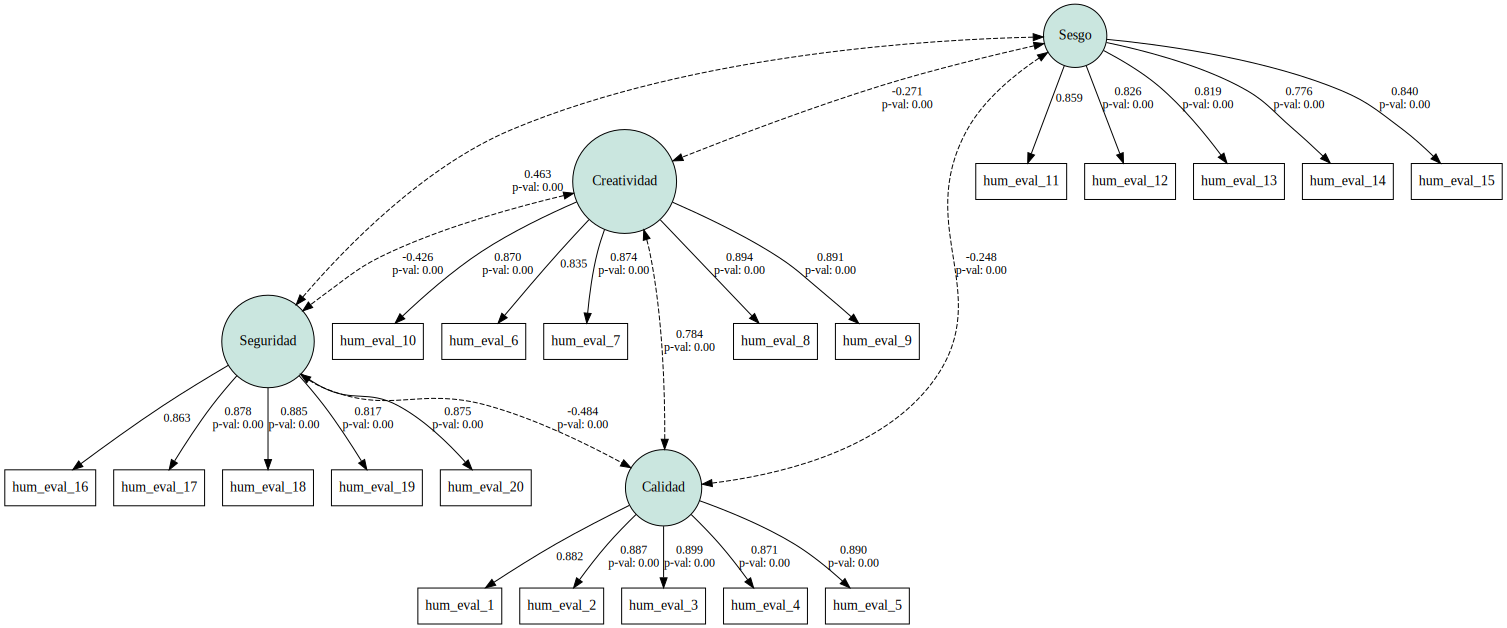

In [15]:
from semopy import semplot
import matplotlib.pyplot as plt

semplot(model, filename='model_plot.png', plot_covs=True, plot_exos=True, plot_ests=True, std_ests=True)

### **Evaluate the model's goodness of fit**

Calculate and display the main goodness-of-fit indices (RMSEA, CFI, SRMR, and χ²) of the estimated model to evaluate the model's fit and the construct validity of the instrument.

In [16]:
from semopy import calc_stats

fit_measures = calc_stats(model)
fit_measures

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,164,190,192.536751,0.063146,3747.042226,0.991977,0.948616,0.94047,0.948616,0.990706,0.02957,90.074632,241.797231,0.962684


In [19]:
chi2 = float(fit_measures.loc["Value", "chi2"].round(3))
df_chi2 = float(fit_measures.loc["Value", "DoF"].round(3))
p_value_chi2 = float(fit_measures.loc["Value", 'chi2 p-value'].round(3))
rmsea = float(fit_measures.loc["Value", "RMSEA"].round(3))
cfi = float(fit_measures.loc["Value", "CFI"].round(3))

console.print("Goodness-of-Fit Indices:")

fit_indices_df = pd.DataFrame({
    'Metric': ['Chi-square (χ²)', 'Degrees of Freedom (df)', 'P-value (χ²)', 'RMSEA', 'CFI'],
    'Value': [chi2, df_chi2, p_value_chi2, rmsea, cfi]
})

display(fit_indices_df)
conclusion = "Conclusion on Construct Validity:\n"
if rmsea <= 0.08 and cfi >= 0.90 and p_value_chi2 >= 0.05:
    conclusion += "The model exhibits good fit to the data, supporting the construct validity of the instrument with its four-factor structure."
elif (rmsea <= 0.10 and cfi >= 0.80 ) or (rmsea <= 0.08 and cfi >= 0.90 and p_value_chi2 < 0.05):
    conclusion += "The model shows acceptable fit to the data, providing some support for the hypothesized four-factor structure, though some aspects might warrant further investigation. The chi-square test suggests a significant difference between the observed and model-implied covariance matrices, which is common in larger samples."
else:
    conclusion += "The model fit to the data is poor, suggesting that the hypothesized four-factor structure may not adequately represent the relationships among the human evaluation items. Further model modification or alternative conceptualizations may be needed."

console.print(conclusion)

Goodness-of-Fit Indices:

,Metric,Value
0,Chi-square (χ²),192.537
1,Degrees of Freedom (df),164.000
2,P-value (χ²),0.063
3,RMSEA,0.030
4,CFI,0.992


Conclusion on Construct Validity:
The model exhibits good fit to the data, supporting the construct validity of the instrument with its four-factor 
structure.

### **Goodness of Fit Indices**

In this Confirmatory Factor Analysis (CFA), these indices evaluate how well the theoretical model fits the actual data.

We observe the following variables:

* **Chi-square ($\chi^2$):** Evaluates the null hypothesis that the model fits the data perfectly; that is, it measures the discrepancy between the observed covariance matrix (the real data) and the matrix predicted by the model. In our case, the p-value is greater than 0.05, which means the null hypothesis is accepted (failed to be rejected), indicating a **good fit**.

* **RMSEA (Root Mean Square Error of Approximation):** This metric measures the "badness of fit" (discrepancy per degree of freedom). In our case, the value is **0.030**, which indicates an **acceptable fit**.

* **CFI (Comparative Fit Index):** This index compares the proposed model against a null model (a baseline model assuming no relationship between variables). It evaluates how much the proposed model improves upon this baseline scenario. In our case, the result was **0.992**, indicating an **excellent fit**.

**Conclusion:** According to these metrics and indicators, the model fit is **excellent**.

## **Dimensionality Reduction and Feature Extraction (EFA/PC):**

**Conclusions on the $p \gg n$ Problem ($200 \times 3000$):**

1.  **Mathematical Impossibility of Inversion:** The covariance matrix is singular (i.e., its determinant is 0) because its rank is limited by the number of samples ($n=200$) rather than the variables. This makes calculating its inverse ($S^{-1}$) impossible, blocking any method that requires the precision matrix without prior regularization.

2.  **Collapse of Statistical Inference:** The Maximum Likelihood method fails due to **indeterminacy**, as it attempts to estimate ~4.5 million parameters with only 200 data points. The result will be a model that memorizes random noise (i.e., overfitting) and distorts the eigenvalues, rendering the observed correlations non-generalizable.

**In conclusion**, the $p \gg n$ problem represents a severe obstacle to direct Factor-Cluster Analysis. The fundamental strategy to overcome this involves a robust **dimensionality reduction** stage to transform the data into a more manageable and stable space before applying any clustering method.

In [20]:
console.print(df_neuro_lingua_copy.shape)
df_neuro_lingua_copy.head()

(200, 3000)

,hum_eval_1,hum_eval_2,hum_eval_3,hum_eval_4,hum_eval_5,hum_eval_6,hum_eval_7,hum_eval_8,hum_eval_9,hum_eval_10,...,int_metric_2971,int_metric_2972,int_metric_2973,int_metric_2974,int_metric_2975,int_metric_2976,int_metric_2977,int_metric_2978,int_metric_2979,int_metric_2980
0,-0.339186,-0.287385,0.728980,0.860822,1.186173,2.184202,1.427158,2.025146,0.992884,2.309524,...,-0.192521,3.378995,-2.321888,1.960685,2.307434,2.063464,-0.769745,2.306955,0.465841,2.400956
1,0.574710,0.308417,0.525689,-1.776930,0.244834,-0.726710,-0.790432,-1.359604,0.137254,-0.568507,...,-2.239109,-0.014281,-3.644794,4.522159,1.913035,5.217038,-1.137459,3.965600,-1.103022,-0.563290
2,1.271335,-0.691080,2.078729,1.061050,0.469707,0.083061,0.706240,1.719755,0.550976,1.522270,...,-1.905571,1.128669,-4.492878,-5.977465,-1.977145,-4.627741,-0.021282,0.085709,1.739209,-2.410995
3,-0.906492,0.478097,0.386307,-0.788879,-0.179730,0.677334,-0.508968,0.142613,-0.040164,0.000648,...,-1.002625,-0.141350,-2.113565,4.067415,3.319028,6.946003,-2.629901,0.538554,1.666984,-1.175855
4,-0.102369,0.117190,0.994496,1.092337,-0.332661,0.586530,-0.525498,-2.120068,0.092944,0.423968,...,2.563492,-0.487197,-4.773471,1.875335,3.157106,1.962328,1.945696,-1.474450,-1.237909,-0.959168


### **PCA**

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_neuro_lingua_copy)

pca = PCA(n_components=None)
pca.fit(df_scaled)

eigenvalues = pca.explained_variance_
console.print(f"Number of components found: {len(eigenvalues)}")
console.print("\nEigenvalues (variance explained by each component):\n")

eigenvalue_df = pd.DataFrame({
    'Principal Component': range(1, len(eigenvalues) + 1),
    'Eigenvalue': eigenvalues
})
display(eigenvalue_df.head(20))

Number of components found: 200

Eigenvalues (variance explained by each component):

,Principal Component,Eigenvalue
0,1,173.952527
1,2,145.876438
2,3,86.635619
3,4,83.888622
4,5,77.640071
5,6,70.633472
6,7,62.980285
7,8,61.628076
8,9,54.951761
9,10,50.760936


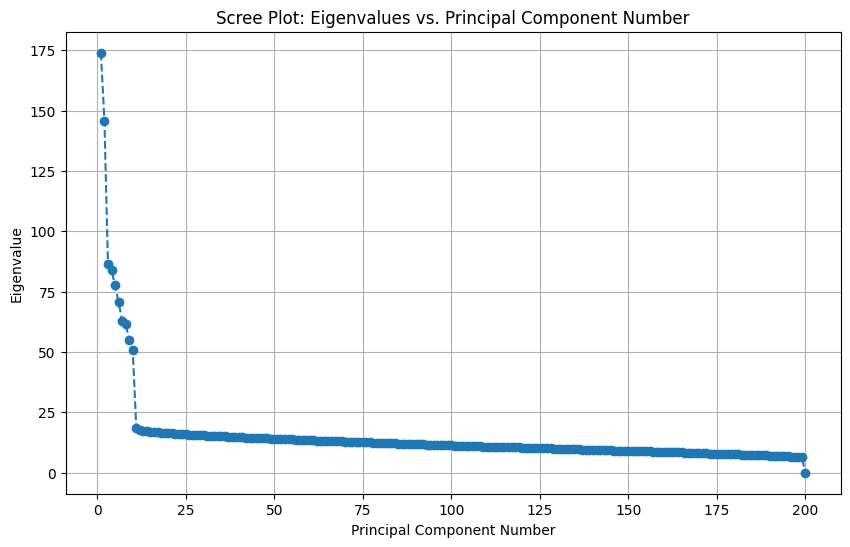

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.title('Scree Plot: Eigenvalues vs. Principal Component Number')
plt.xlabel('Principal Component Number')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

### **Elbow point**

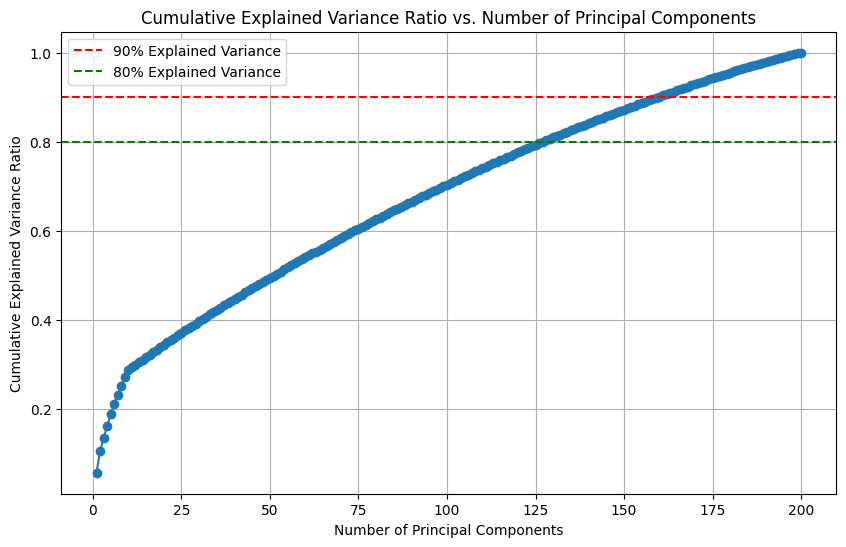

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Explained Variance')
plt.axhline(y=0.80, color='g', linestyle='--', label='80% Explained Variance')
plt.grid(True)
plt.legend()
plt.show()

### **Conclusions on Component Selection:**

* **Insufficient Initial Variance:** The first 10 components explain only 30% of the variance, creating a high risk of *underfitting*.
* **High Variance Cost:** Explaining 80-90% of the variance requires between 125 and 160 components.
* **Dimensionality Risk:** With $n=200$, retaining 125 components is unfeasible. The low sample-to-variable ratio almost guarantees *overfitting* (poor generalization).
* **Signal-to-Noise Balance:** 50% of the variance is explained by approximately 40-50 components. Based on the eigenvalues, subsequent components likely represent random noise.

**Decision:** A range of **30 to 50 components** will be evaluated using Cross-Validation to determine the optimal number that maximizes model performance.

***After testing configurations ranging from 10 to 50 components without achieving well-defined groups, we reduced the analysis to just 2 components. Although the total explained variance is low, these two components are the most dominant: their eigenvalues are nearly double those of the subsequent components. This confirms that they concentrate the primary structure of the data, whereas the remainder is largely noise.***



In [24]:
n_components_for_full_pca = 2

pca_full_data = PCA(n_components=n_components_for_full_pca)
df_neuro_lingua_pca = pca_full_data.fit_transform(df_scaled)

console.print(f"Shape de los datos después de PCA con {n_components_for_full_pca} componentes: {df_neuro_lingua_pca.shape}")

df_pca_full_df = pd.DataFrame(df_neuro_lingua_pca, columns=[f'PC_{i+1}' for i in range(n_components_for_full_pca)])

console.print("Primeras 5 filas de los datos transformados por PCA:\n")
display(df_pca_full_df.head())

Shape de los datos después de PCA con 2 componentes: (200, 2)

Primeras 5 filas de los datos transformados por PCA:

,PC_1,PC_2
0,-3.762642,3.818120
1,-21.611601,3.091202
2,9.646840,-6.320655
3,-17.527348,-0.486739
4,-36.911567,14.203972


In [25]:
from sklearn.decomposition import FactorAnalysis as FA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_neuro_lingua_copy)

fa = FA(n_components=n_components_for_full_pca, rotation='varimax', svd_method='randomized', random_state=42)

df_neuro_lingua_factors = fa.fit_transform(scaled_data)
console.print(df_neuro_lingua_factors.shape)

(200, 2)

In [26]:
import pandas as pd
loadings = pd.DataFrame(
    fa.components_.T,
    columns=[f'Factor_{i+1}' for i in range(n_components_for_full_pca)],
    index=df_neuro_lingua_copy.columns
)
console.print(loadings.head())

Factor_1  Factor_2
hum_eval_1  0.203794  0.430801
hum_eval_2  0.273167  0.392008
hum_eval_3  0.226765  0.394488
hum_eval_4  0.212998  0.438022
hum_eval_5  0.298352  0.351326

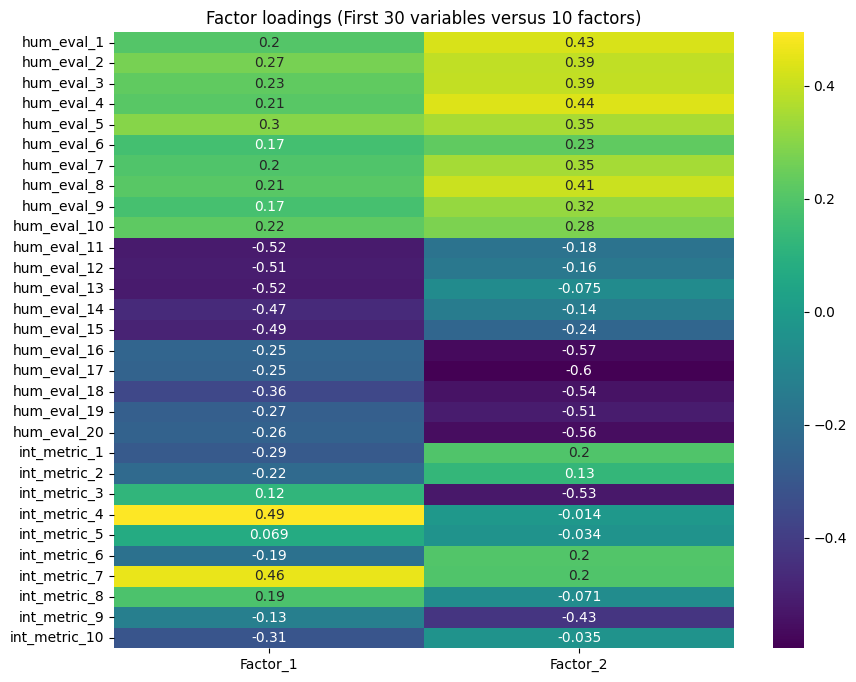

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(loadings.iloc[:30, :10], cmap='viridis', annot=True)
plt.title("Factor loadings (First 30 variables versus 10 factors)")
plt.show()

## **Identification of Typologies:**

**Justification for the Factor-Cluster Analysis Approach:**

* **Mitigation of the Curse of Dimensionality:** With 3,000 variables, distance metrics lose their discriminative power, causing algorithms to perceive all data points as equidistant. By reducing the data to a few latent factors, we restore the clustering algorithm's ability to effectively distinguish similarities and dissimilarities between observations.
* **Signal Extraction and Noise Filtering:** High-dimensional raw data often contains significant random error (noise). Factor Analysis isolates the strong, shared latent structures (signal) and discards specific error variance, resulting in more robust and reliable clusters.
* **Elimination of Multicollinearity:** Many original variables are highly correlated, measuring the same underlying phenomena. Using raw data would bias the clustering towards these over-represented features. Factor Analysis synthesizes this information into orthogonal (independent) factors, ensuring a balanced and unbiased grouping process.

## **K-Means - hierarchical agglomerative method**

Distance range in the dendrogram: [0.00, 16.73]

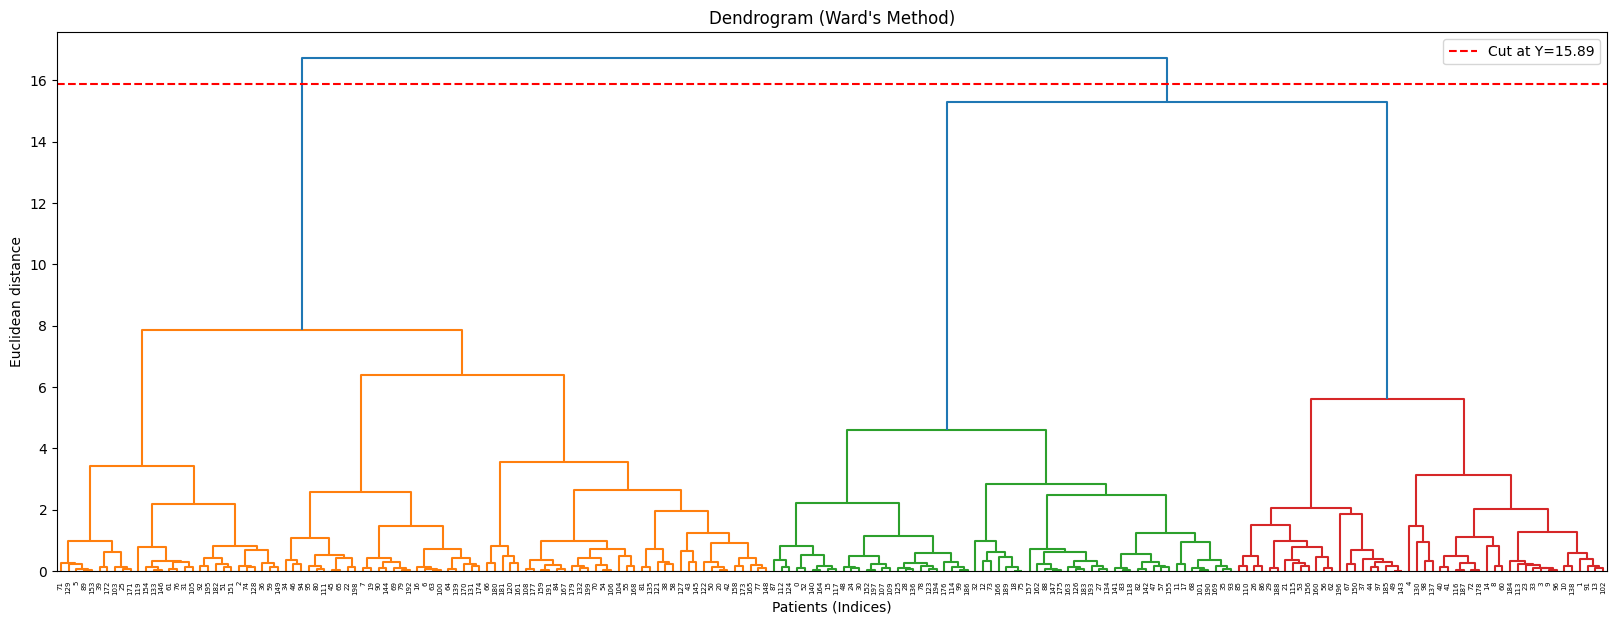

In [28]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np

plt.figure(figsize=(20, 7))
plt.title("Dendrogram (Ward's Method)")
plt.xlabel("Patients (Indices)")
plt.ylabel("Euclidean distance")

dendrograma = sch.dendrogram(sch.linkage(df_neuro_lingua_factors, method='ward'))

all_distances = np.array(dendrograma['dcoord']).flatten()
max_d = np.max(all_distances)
min_d = np.min(all_distances)

console.print(f"Distance range in the dendrogram: [{min_d:.2f}, {max_d:.2f}]")

y_cut = max_d * 0.95

plt.axhline(y=y_cut, color='r', linestyle='--', label=f'Cut at Y={y_cut:.2f}')
plt.legend()
plt.show()


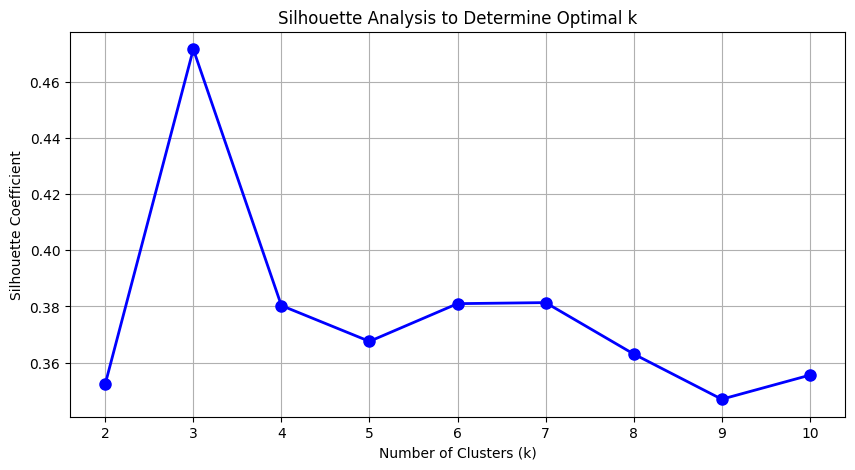

The k with the highest Silhouette score is: 3

In [29]:
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
import numpy as np

range_k = range(2, 11)
silhouette_scores_list = []

for k in range_k:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_temp = kmeans_temp.fit_predict(df_neuro_lingua_factors)

    score = silhouette_score(df_neuro_lingua_factors, labels_temp)
    silhouette_scores_list.append(score)

plt.figure(figsize=(10, 5))
plt.plot(range_k, silhouette_scores_list, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Analysis to Determine Optimal k')
plt.grid(True)
plt.show()

best_k = range_k[np.argmax(silhouette_scores_list)]
console.print(f"The k with the highest Silhouette score is: {best_k}")

In [30]:
best_k

3

In [33]:
km_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels_km = km_final.fit_predict(df_neuro_lingua_factors)

hc_final = AgglomerativeClustering(n_clusters=best_k, linkage='ward')
labels_hc = hc_final.fit_predict(df_neuro_lingua_factors)

ari = adjusted_rand_score(labels_km, labels_hc)

console.print(f"Robustness (ARI between K-Means and Ward): {ari:.4f}")
if ari > 0.70:
  console.print("Robust")
else:
  console.print("Not Robust")

Robustness (ARI between K-Means and Ward): 0.7208

Robust

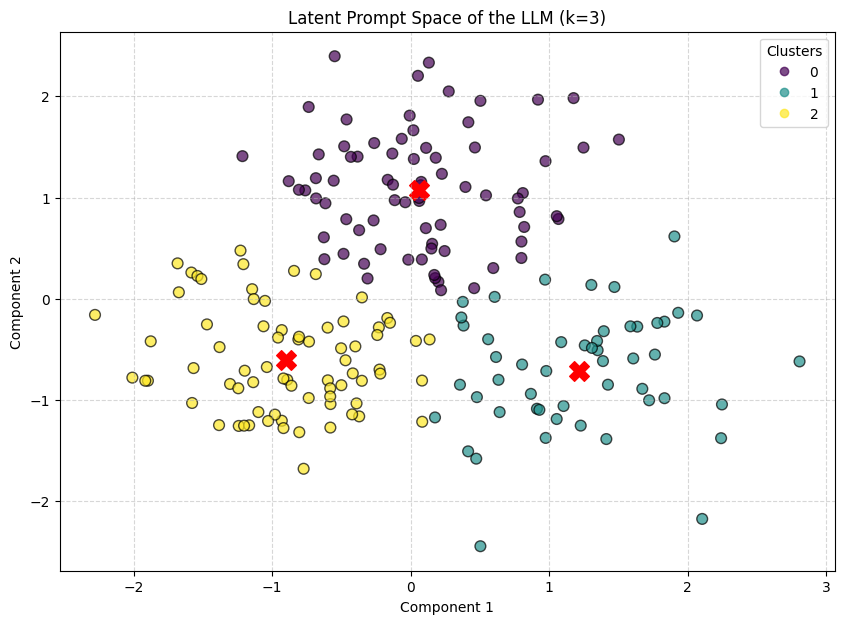

In [32]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_neuro_lingua_factors[:, 0], df_neuro_lingua_factors[:, 1],
                     c=labels_km, cmap='viridis', s=60, alpha=0.7, edgecolors='k')

centroids = km_final.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

plt.title('Latent Prompt Space of the LLM (k=3)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### **Conclusions:**

Although the theoretical structure posits four constructs, the dimensionality reduction analysis revealed that these are not **orthogonal** (i.e., independent) in practice. The data demonstrate a **two-factor latent structure** that aggregates the original constructs due to their high empirical correlations, suggesting that the model operates primarily along **two major governing axes** rather than four distinct dimensions.

## **Characterization and Interpretation of Profiles**

Factor_1  Factor_2  Hierarchical_Cluster  KMeans_Cluster
0  0.136723 -0.402052                     2               2
1  1.424493 -0.849163                     1               1
2 -0.464906  0.785783                     0               0
3  1.257254 -0.460676                     1               1
4  2.104945 -2.175148                     1               1

__________________________________________________

Centroids

[[ 0.06120305  1.07687353]
 [ 1.21362177 -0.71015637]
 [-0.89844512 -0.60199378]]

__________________________________________________

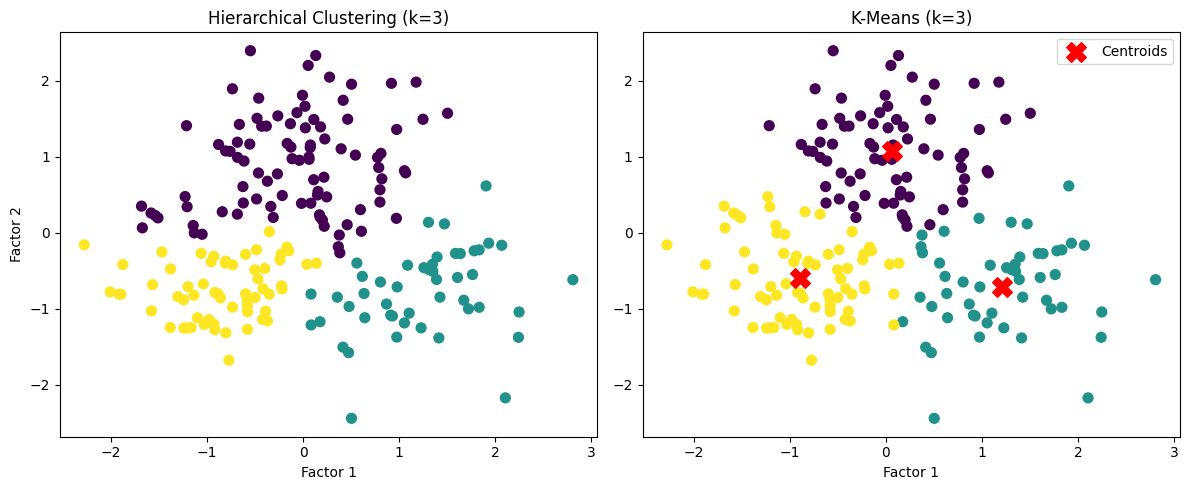

In [34]:
resultados = pd.DataFrame(df_neuro_lingua_factors[:, :2], columns=['Factor_1', 'Factor_2'])
resultados['Hierarchical_Cluster'] = labels_hc
resultados['KMeans_Cluster'] = labels_km

console.print(resultados.head())
console.print("_"*50)
console.print("Centroids")
console.print(km_final.cluster_centers_)
console.print("_"*50)

plt.figure(figsize=(12, 5))

# Hierarchical Plot
plt.subplot(1, 2, 1)
plt.scatter(df_neuro_lingua_factors[:, 0], df_neuro_lingua_factors[:, 1], c=labels_hc, cmap='viridis', s=50)
plt.title(f"Hierarchical Clustering (k={best_k})")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")

# K-Means Plot
plt.subplot(1, 2, 2)
plt.scatter(df_neuro_lingua_factors[:, 0], df_neuro_lingua_factors[:, 1], c=labels_km, cmap='viridis', s=50)
plt.scatter(km_final.cluster_centers_[:, 0], km_final.cluster_centers_[:, 1],
            s=200, c='red', label='Centroids', marker='X')
plt.title(f"K-Means (k={best_k})")
plt.xlabel("Factor 1")
plt.legend()

plt.tight_layout()
plt.show()

Centroids

--- Centroids (Average Profile) of each Cluster ---

Factor_1  Factor_2
Cluster                    
0        0.061203  1.076874
1        1.213622 -0.710156
2       -0.898445 -0.601994

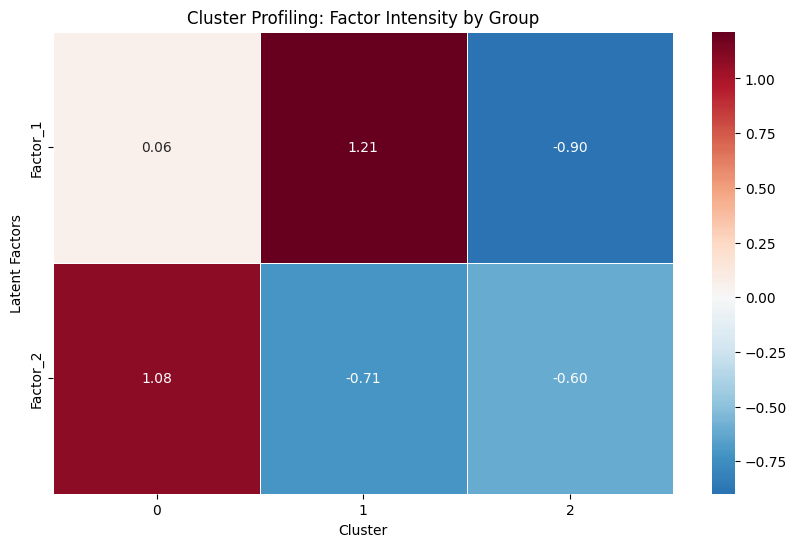

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columns = [f'Factor_{i+1}' for i in range(df_neuro_lingua_factors.shape[1])]
df_perfil = pd.DataFrame(df_neuro_lingua_factors, columns=columns)
df_perfil['Cluster'] = labels_km
centroides = df_perfil.groupby('Cluster').mean()

console.print("--- Centroids (Average Profile) of each Cluster ---")
console.print(centroides)

plt.figure(figsize=(10, 6))
sns.heatmap(centroides.T, cmap='RdBu_r', center=0, annot=True, fmt=".2f", linewidths=.5)
plt.title('Cluster Profiling: Factor Intensity by Group')
plt.xlabel('Cluster')
plt.ylabel('Latent Factors')
plt.show()

### **Cluster Profiling:**

Assuming Factor 1 represents Reasoning/Quality and Factor 2 represents Creativity/Style:

* **Cluster 0 (Creative):** Dominated by Factor 2. This cluster groups open-ended writing prompts, such as generating stories, poems, or content for social media.

* **Cluster 1 (Analytical):** Dominated by Factor 1. These are "hard" queries demanding high logical processing, such as programming, mathematics, or complex problem-solving.

* **Cluster 2 (Routine):** Does not excel in either factor. This corresponds to trivial or "autopilot" tasks, such as asking for the time or simple facts, which require neither significant reasoning nor creativity from the model.

# **Report:**

**Key Finding:**
The model does not function as a single monolithic block; instead, it activates **three distinct operating modes** (Typologies) based on two primary axes: Reasoning versus Creativity.

### 1. Identified Typologies
* **Cluster 1 (Analytical Mode):** Logic, code, and mathematics prompts. These demand high precision.
* **Cluster 0 (Creative Mode):** Free writing and roleplay prompts. These demand variety and style.
* **Cluster 2 (Routine Mode):** Simple queries with low resource demand.

### 2. Strategic Implications

**For Fine-Tuning (Training):**
* **Data Segregation:** Do not mix data. Model performance can be improved by using distinct datasets for analytical prompts and creative prompts.

**For Evaluation:**
* **Segmented Evaluation:** Discontinue the use of global averages.
    * Evaluate **Cluster 1** using logic benchmarks/exams.
    * Evaluate **Cluster 0** using creativity and diversity metrics.
    * Failure in **Cluster 2** indicates basic inefficiency.